# FMT Module Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1. Import and understand the data

1.A. Import ‘signal-data.csv’ as DataFrame

In [2]:
Signal = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\FMT\signal-data.csv')

1.B. Print 5 point summary and share at least 2 observations

In [3]:
Signal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [4]:
Signal.describe().transpose()['count'].value_counts()

1561.0    100
1566.0     92
1565.0     84
1567.0     53
1558.0     48
1543.0     43
1564.0     24
1563.0     24
1553.0     20
1560.0     20
1559.0     12
1307.0     12
549.0      12
1294.0      8
1516.0      8
138.0       4
773.0       4
852.0       4
226.0       4
1555.0      4
1557.0      4
618.0       4
1562.0      3
Name: count, dtype: int64

In [5]:
Signal.describe().transpose()[['mean', 'std']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean,591.0,87.060948,609.315811,-5618.39361,0.001555,0.744976,10.100814,8827.536865
std,591.0,58.810242,387.113043,0.00000,0.003159,0.177600,6.281289,6553.569317


Observations:
    
    1. Some features have many missing values so could be removed
    2. Mean and std deviation have lot of variation across all the features as evident from min and max values as above

Question 2. Data cleansing

2.A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [6]:
# Define the threshold for null values
threshold = 0.2

# Loop through each column in the dataset
for column in Signal.columns:
    
    # Calculate the percentage of null values in the column
    null_percentage = Signal[column].isnull().sum() / len(Signal)
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(Signal[column]):
        
        # If the percentage of null values is less than the threshold, impute with the column mean
        if null_percentage < threshold:
            column_mean = Signal[column].mean()
            Signal[column].fillna(column_mean, inplace=True)
        
        # Otherwise, remove the column
        else:
            Signal.drop(column, axis=1, inplace=True)
    
    # If the column is not numeric, remove it only if the null_percentage >= threshold
    else:
        if null_percentage >= threshold:
            Signal.drop(column, axis=1, inplace=True)

2.B. Identify and drop the features which are having same value for all the row

In [7]:
# Identify the columns with the same value for all rows
same_value_columns = []
for column in Signal.columns:
    if Signal[column].nunique() == 1:
        same_value_columns.append(column)

# Drop the identified columns
Signal.drop(same_value_columns, axis=1, inplace=True)

In [8]:
Signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 444 entries, Time to Pass/Fail
dtypes: float64(442), int64(1), object(1)
memory usage: 5.3+ MB


2.C. Drop other features if required using relevant functional knowledge. Clearly justify the same

In [9]:
Signal.drop("Time", axis=1, inplace=True) # Removing Time feature as it is not numeric

In [10]:
# Using logistic regression model to do backward elimination
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Remove the target variable column from the DataFrame
X = Signal.drop('Pass/Fail', axis=1)
y = Signal['Pass/Fail']

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled into a dataframe
df = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
# Backward elimination to select top 100 features
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=100)
rfe.fit(df, y)
selected_features = list(df.columns[rfe.support_])

# Print the selected features
print(selected_features)

['7', '14', '17', '19', '25', '26', '29', '30', '32', '35', '40', '43', '45', '53', '56', '59', '60', '61', '62', '64', '65', '66', '67', '70', '75', '92', '99', '105', '117', '129', '130', '131', '132', '138', '142', '143', '145', '151', '155', '168', '176', '188', '196', '204', '205', '210', '214', '216', '228', '239', '249', '250', '268', '277', '289', '301', '303', '305', '310', '311', '312', '324', '332', '333', '337', '338', '340', '348', '349', '354', '357', '359', '366', '377', '386', '388', '406', '415', '424', '425', '428', '430', '435', '439', '441', '446', '454', '455', '471', '488', '491', '493', '511', '520', '540', '566', '568', '574', '576', '577']


In [12]:
df = df[selected_features]

2.D. Check for multi-collinearity in the data and take necessary action

In [13]:
# High correlation
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df.drop(to_drop, axis=1, inplace=True)

In [14]:
df.columns

Index(['7', '14', '17', '19', '25', '29', '32', '35', '40', '43', '45', '53',
       '56', '59', '61', '62', '64', '66', '67', '75', '92', '99', '117',
       '129', '130', '131', '132', '138', '142', '143', '145', '151', '168',
       '176', '188', '210', '214', '216', '228', '239', '249', '250', '268',
       '289', '301', '305', '310', '312', '337', '338', '349', '357', '359',
       '386', '430', '439', '454', '455', '488', '511', '566', '574'],
      dtype='object')

In [15]:
len(df.columns)

62

2.E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions

So far as part of data cleaning and feature engineering, I have done the following,
1. Removed features with >= 20% null values and rest imputed with mean
2. Dropped all features that has same values for all rows
3. Used backward feature elimination technique to reduce to top 100 features
4. Checked for multi-collinearity and removed features having strong correlation (> 0.8). This operation further reduced the number of features from 100 to 62

As a next step, we can do PCA to further reduce the number of features for better model interpretebility.

Question 3. Data analysis & visualisation

3.A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

In [16]:
variable_1 = Signal['7']

mean = np.mean(variable_1)
median = np.median(variable_1)
std_dev = np.std(variable_1)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 0.12182150192554557
Median: 0.1224
Standard Deviation: 0.008932678427901398


In [17]:
variable_2 = Signal['142']

mean = np.mean(variable_2)
median = np.median(variable_2)
std_dev = np.std(variable_2)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 6.641564713457823
Median: 6.27
Standard Deviation: 3.535211491851136


In [18]:
variable_3 = Signal['511']

mean = np.mean(variable_3)
median = np.median(variable_3)
std_dev = np.std(variable_3)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 275.97945674121405
Median: 0.0
Standard Deviation: 329.3489599748305


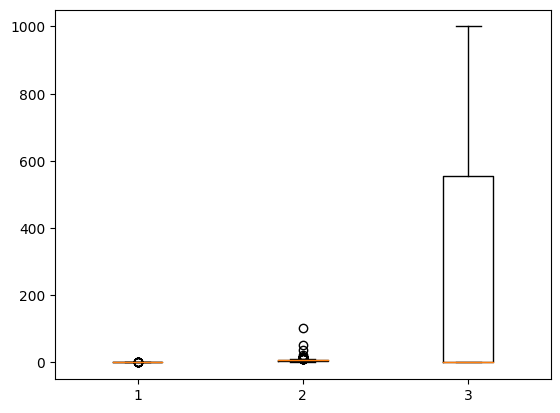

In [19]:
plt.boxplot(Signal[['7', '142', '511']])
plt.show()

Observation 1: Feature 511 has the highest variation followed by feature 142 and then feature 7.

In [20]:
q1 = np.percentile(variable_1, 25)
q3 = np.percentile(variable_1, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_1 = variable_1[(variable_1 < lower_bound) | (variable_1 > upper_bound)]

q1 = np.percentile(variable_2, 25)
q3 = np.percentile(variable_2, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_2 = variable_2[(variable_2 < lower_bound) | (variable_2 > upper_bound)]

q1 = np.percentile(variable_3, 25)
q3 = np.percentile(variable_3, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_3 = variable_3[(variable_3 < lower_bound) | (variable_3 > upper_bound)]

In [21]:
print("Number of outliers for variable 1:", len(outliers_1))
print("Number of outliers for variable 2:", len(outliers_2))
print("Number of outliers for variable 3:", len(outliers_3))

Number of outliers for variable 1: 12
Number of outliers for variable 2: 61
Number of outliers for variable 3: 0


Observation 2: Feature 142 has the highest number of outliers (61) followed by feature 7 (12) and feature 511 (0).

In [22]:
from scipy.stats import normaltest
stat, p = normaltest(variable_1)
if p < 0.05:
    print("The variable 1 is not normally distributed.")
else:
    print("The variable 1 is normally distributed.")
    
stat, p = normaltest(variable_2)
if p < 0.05:
    print("The variable 2 is not normally distributed.")
else:
    print("The variable 2 is normally distributed.")
    
stat, p = normaltest(variable_3)
if p < 0.05:
    print("The variable 3 is not normally distributed.")
else:
    print("The variable 3 is normally distributed.")

The variable 1 is not normally distributed.
The variable 2 is not normally distributed.
The variable 3 is not normally distributed.


Observation 3: All 3 features are not normally distributed.

3.B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

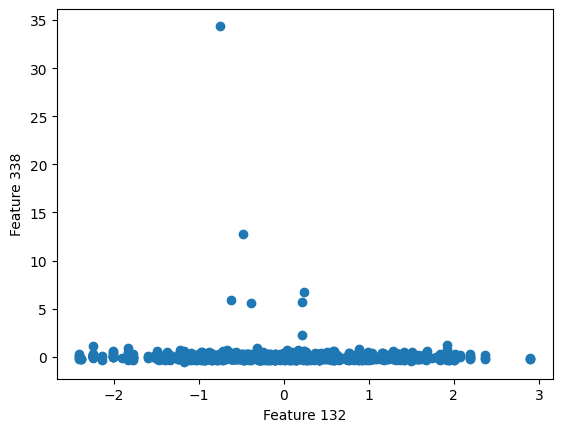

In [24]:
# Create scatter plot for the selected 132 and 338 features
plt.scatter(df['132'], df['338'])

plt.xlabel('Feature 132')
plt.ylabel('Feature 338')
plt.show()

In [25]:
# Calculate the correlation coefficient
corr = df['132'].corr(df['338'])
print(corr)

-0.03926309418088816


Observation 1: The two features 132 and 338 have almost no correlation as evident from the graph and correlation value.

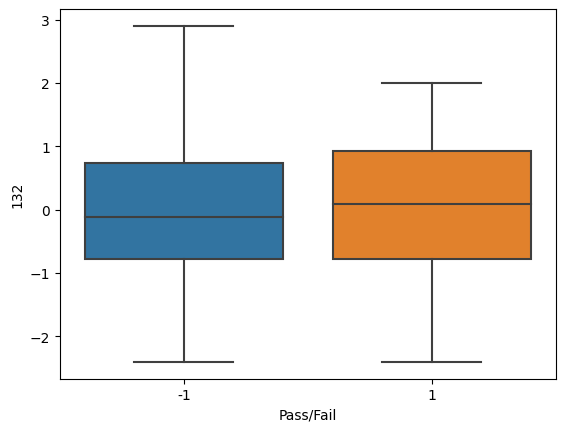

In [46]:
df["Pass/Fail"] = Signal["Pass/Fail"]

# Create box plot
sns.boxplot(x='Pass/Fail', y='132', data=df)
plt.show()

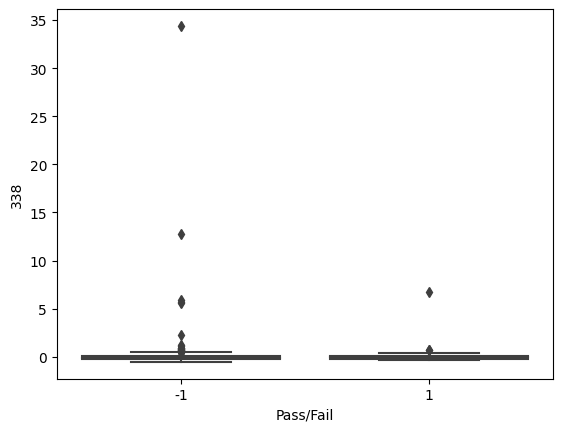

In [47]:
sns.boxplot(x='Pass/Fail', y='338', data=df)
plt.show()

Observation 2: The distribution of data points for feature 132 is more dispersed compared to the feature 338.

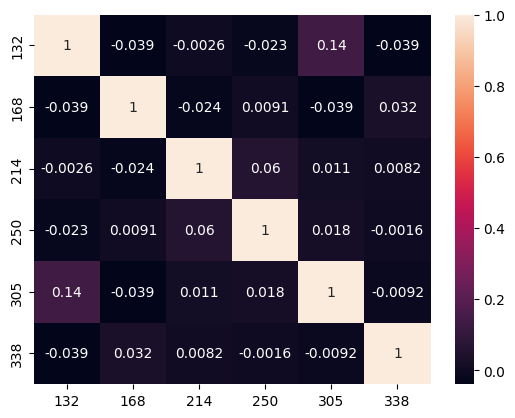

In [26]:
# Create heatmap
sns.heatmap(df[["132", "168", "214", "250", "305", "338"]].corr(), annot=True)
plt.show()

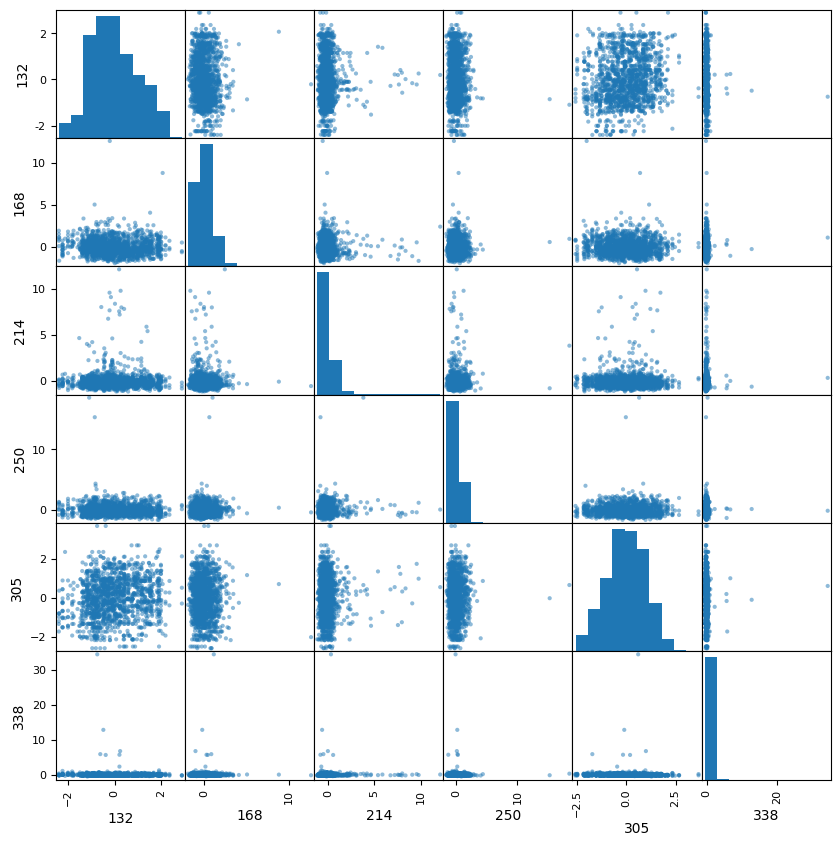

In [28]:
# Create scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df[["132", "168", "214", "250", "305", "338"]], figsize=(10, 10))
plt.show()

Observation 3: As observed from the heatmap and scatter matrix of the selected 6 features, the correlation values between feature are very less with the highest value being 0.14 in magnitude.

In [39]:
# Perform K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=5)
kmeans.fit(df[["132", "168", "214", "250", "305", "338"]])
df['Cluster'] = kmeans.labels_

# Show the cluster distribution
df['Cluster'].value_counts()

0    548
2    546
1    473
Name: Cluster, dtype: int64

Observation 4: All the data points are equally falling within the 3 clusters. So this confirms that there is uniformity in the dataset.

Question 4. Data pre-processing

4.A. Segregate predictors vs target attributes

In [49]:
df.drop("Cluster", axis=1, inplace=True)

In [51]:
X = df.drop('Pass/Fail', axis=1) 
y = df['Pass/Fail']

4.B. Check for target balancing and fix it if found imbalanced

In [52]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [54]:
# Upsample minority class
from sklearn.utils import resample

majority_class = y.value_counts().index[0]
minority_class = y.value_counts().index[1]
minority_class_count = y.value_counts()[minority_class]

df_minority = df[df['Pass/Fail'] == minority_class]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=y.value_counts()[majority_class],  
                                 random_state=42)

df_upsampled = pd.concat([df[df['Pass/Fail'] == majority_class], df_minority_upsampled])
 
print(df_upsampled['Pass/Fail'].value_counts())

-1    1463
 1    1463
Name: Pass/Fail, dtype: int64


4.C. Perform train-test split and standardise the data or vice versa if required

In [59]:
X_upsampled = df_upsampled.drop('Pass/Fail', axis=1) 
y_upsampled = df_upsampled['Pass/Fail']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4.D. Check if the train and test data have similar statistical characteristics when compared with original data

In [64]:
df_upsampled.describe()

,7,14,17,19,25,29,32,35,40,43,...,386,430,439,454,455,488,511,566,574,Pass/Fail
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,...,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,0.026919,-0.118503,-0.008167,0.047862,-0.062247,0.017889,0.075048,-0.030634,-0.108790,-0.038913,...,0.018747,2.236700e-01,-0.013405,-0.051970,0.100101,-0.045743,0.118391,-0.010287,-0.062026,0.000000
std,0.747783,0.997912,0.833774,0.756040,1.241499,0.966650,1.183063,0.852950,1.070231,0.963342,...,0.870025,1.643135e+00,0.892675,0.890230,0.960085,1.032478,1.039866,1.004284,0.832333,1.000171
min,-13.637735,-2.418909,-32.542848,-11.987787,-6.784885,-4.162346,-1.063850,-0.341372,-2.784679,-2.051832,...,-0.483156,-5.113482e-01,-1.474288,-1.816505,-3.137042,-1.410324,-0.837955,-2.343664,-0.301834,-1.000000
25%,-0.080771,-0.859604,-0.335679,-0.089475,0.234770,-0.706332,-0.359581,-0.209693,-0.098655,-0.751626,...,-0.242572,-2.971919e-01,-0.557109,-0.648097,-0.698792,-1.001570,-0.837955,-0.555006,-0.245882,-1.000000
50%,0.053567,-0.066620,0.046159,0.077192,0.452883,0.028417,-0.076913,-0.153234,0.418726,-0.276822,...,-0.089180,-1.716907e-01,-0.109458,-0.215273,0.353781,-0.057341,-0.096265,0.000000,-0.229276,0.000000
75%,0.221490,0.556030,0.486102,0.305094,0.570958,0.681363,0.197521,-0.101895,0.500837,0.788784,...,0.091661,9.861650e-17,0.343649,0.479382,0.806769,0.635492,1.125238,0.335912,-0.209817,1.000000
max,0.758843,3.774092,1.108663,2.342397,1.008594,2.804053,10.006802,11.545706,0.763088,3.492112,...,19.280213,1.059188e+01,15.313692,11.180455,6.981824,2.579349,2.198339,12.155232,5.977286,1.000000


In [69]:
# exclude the 'target' column
cols_to_include = [col for col in df_upsampled.columns if col != 'Pass/Fail']

In [71]:
train_df = pd.DataFrame(X_train, columns=df_upsampled[cols_to_include].columns)
test_df = pd.DataFrame(X_test, columns=df_upsampled[cols_to_include].columns)

In [72]:
train_df.describe()

,7,14,17,19,25,29,32,35,40,43,...,359,386,430,439,454,455,488,511,566,574
count,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,...,2.340000e+03,2340.000000,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03,2.340000e+03
mean,3.036507e-18,-2.429206e-17,-3.036507e-18,1.518254e-17,9.109522e-18,-1.670079e-17,9.109522e-18,-3.036507e-18,1.214603e-17,2.353293e-17,...,-5.313888e-18,0.000000,1.214603e-17,-4.554761e-18,4.175198e-18,6.073015e-18,-9.868649e-18,1.214603e-17,1.518254e-17,-3.112420e-17
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,...,1.000214e+00,1.000214,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-2.043789e+01,-2.325525e+00,-3.697239e+01,-1.517403e+01,-5.380554e+00,-4.326480e+00,-9.461004e-01,-3.642807e-01,-2.469044e+00,-2.081099e+00,...,-1.507455e+00,-0.641676,-4.515715e-01,-1.646212e+00,-1.943565e+00,-3.304030e+00,-1.314767e+00,-9.133404e-01,-2.322004e+00,-2.888087e-01
25%,-1.723566e-01,-7.393900e-01,-3.753999e-01,-1.616717e-01,2.494085e-01,-7.553184e-01,-3.598392e-01,-2.095979e-01,1.756985e-02,-7.361936e-01,...,-7.372734e-01,-0.328676,-3.213353e-01,-6.138381e-01,-6.562384e-01,-8.129931e-01,-9.777096e-01,-9.133404e-01,-5.386325e-01,-2.209439e-01
50%,2.845788e-02,5.317190e-02,5.848199e-02,3.990268e-02,4.113213e-01,3.910921e-03,-1.290348e-01,-1.453867e-01,4.942136e-01,-2.409510e-01,...,-8.934256e-02,-0.125648,-2.486657e-01,-9.695696e-02,-1.807191e-01,2.693430e-01,-2.365169e-03,-2.498436e-01,1.473290e-02,-2.006560e-01
75%,2.794760e-01,6.759223e-01,5.701796e-01,3.361648e-01,5.042294e-01,6.786127e-01,9.488303e-02,-8.349103e-02,5.702283e-01,8.500891e-01,...,6.074887e-01,0.102757,-1.376997e-01,4.124505e-01,5.890338e-01,7.384116e-01,6.749935e-01,9.662696e-01,3.453478e-01,-1.771786e-01
max,9.153887e-01,3.924635e+00,1.265805e+00,2.906674e+00,8.560175e-01,2.562767e+00,8.190275e+00,1.345459e+01,8.153372e-01,3.662996e+00,...,8.382658e+00,24.669052,6.300699e+00,1.741027e+01,1.236518e+01,7.153059e+00,2.555239e+00,1.993684e+00,1.213404e+01,7.328749e+00


In [73]:
test_df.describe()

,7,14,17,19,25,29,32,35,40,43,...,359,386,430,439,454,455,488,511,566,574
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,-0.056808,-0.019414,-0.016221,0.057973,-0.004499,-0.034790,-0.030916,-0.015195,0.040881,0.022424,...,0.019077,0.078462,-0.022872,0.060290,-0.004663,0.021594,0.044361,0.011429,0.022353,0.010565
std,1.498333,1.034978,0.698414,0.739625,0.966973,0.993782,0.874982,0.956983,0.952292,0.990365,...,1.001796,1.577340,0.996028,1.063466,0.895980,0.986421,1.006744,0.977719,1.006361,1.047804
min,-20.437889,-2.325525,-5.949838,-15.174028,-4.364428,-4.214114,-0.936932,-0.359221,-2.434217,-1.820025,...,-1.544131,-0.590919,-0.429140,-1.467422,-1.747013,-3.358420,-1.314767,-0.913340,-2.322004,-0.265119
25%,-0.172357,-0.809707,-0.375400,-0.141630,0.048911,-0.755318,-0.383117,-0.213698,0.017570,-0.733047,...,-0.737273,-0.301182,-0.324005,-0.579500,-0.675690,-0.827587,-0.766267,-0.913340,-0.538633,-0.220342
50%,0.011723,0.034364,0.058482,0.056749,0.411321,-0.024181,-0.131602,-0.147691,0.496541,-0.254179,...,-0.058780,-0.108729,-0.234146,-0.071367,-0.170476,0.267571,0.017253,-0.187794,0.008797,-0.201542
75%,0.308761,0.705489,0.530093,0.332679,0.513250,0.650521,0.112314,-0.103460,0.572555,0.889857,...,0.607489,0.142940,-0.156235,0.429336,0.569681,0.758738,0.664075,0.966270,0.397903,-0.177179
max,1.082734,3.416700,1.180915,2.452406,0.856018,2.872026,7.173334,13.454592,0.787413,2.754907,...,8.382658,25.244296,6.300699,14.204770,2.801007,2.363896,2.518225,1.954924,5.589235,5.936445


Observation: Training data has all the values on a lower scale compared to the original and test data. This is because only the training data was standardized for model building and original and test data were not standardized.

Question 5. Model training, testing and tuning

5.A. Use any Supervised Learning technique to train a model

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model training
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

# evaluate the accuracy on the test data
test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

Test accuracy: 94.88%


5.B. Use cross validation techniques

In [88]:
from sklearn.model_selection import cross_val_score

# perform k-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.9465812  0.9465812  0.95299145 0.95940171 0.94871795]


In [89]:
from sklearn.model_selection import StratifiedKFold

# perform k-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train, y_train, cv=skf)
print(scores)

[0.93589744 0.94871795 0.95299145 0.96153846 0.95726496]


In [90]:
from sklearn.model_selection import LeaveOneOut

# perform leave-one-out cross-validation
loo = LeaveOneOut()
scores = cross_val_score(clf, X_train, y_train, cv=loo)
print(scores)

[1. 1. 1. ... 1. 1. 1.]


In [92]:
from sklearn.model_selection import ShuffleSplit

# perform shuffle-split cross-validations with 20% of the data in the test set
ss = ShuffleSplit(n_splits=5, test_size=0.2)
scores = cross_val_score(clf, X_train, y_train, cv=ss)
print(scores)

[0.96153846 0.95940171 0.92521368 0.95299145 0.94871795]


5.C. Apply hyper-parameter tuning techniques to get the best accuracy

In [93]:
from sklearn.model_selection import GridSearchCV

# define the hyper-parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# perform grid search with 5-fold cross-validation
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

# print the best hyper-parameters and their corresponding score
print("Best hyper-parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyper-parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.9320512820512821


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define the hyper-parameter distribution
param_dist = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

# perform random search with 5-fold cross-validation
random = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, n_iter=10)
random.fit(X_train, y_train)

# print the best hyper-parameters and their corresponding score
print("Best hyper-parameters: ", random.best_params_)
print("Best score: ", random.best_score_)

Best hyper-parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score:  0.9508547008547008


5.D. Use any other technique/method which can enhance the model performance

Note: We have already used attribute removal, standardisation/normalisation, target balancing techniques. So for this question, we will only do dimensionality reduction using PCA

In [97]:
from sklearn.decomposition import PCA

# Define the PCA model and fit it to the data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_upsampled)

# Print the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

[0.08701357 0.07322989 0.05662771 0.04962456 0.04572376 0.03732261
 0.03498805 0.03012426 0.02943544 0.02753065]


5.E. Display and explain the classification report in detail

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.89      0.92       300
           1       0.89      0.96      0.92       286

    accuracy                           0.92       586
   macro avg       0.92      0.92      0.92       586
weighted avg       0.93      0.92      0.92       586



Observation: Based on the above classification report, the decision tree classifier performs well with accuracy, precision, recall and f1-score metrics are 92%, 93%, 92% and 92% respectively.

5.F. Apply the above steps for all possible models that you have learnt so far

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_upsampled, test_size=0.2, random_state=42)

# Define a list of classifiers to train
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

Question 6. Post Training and Conclusion

6.A. Display and compare all the models designed with their train and test accuracies

In [105]:
# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    print(f"{type(clf).__name__}_train: {acc_train}")
    print(f"{type(clf).__name__}_test: {acc_test}")

LogisticRegression_train: 0.6367521367521367
LogisticRegression_test: 0.6399317406143344
DecisionTreeClassifier_train: 1.0
DecisionTreeClassifier_test: 0.9726962457337884
SVC_train: 0.8106837606837607
SVC_test: 0.7986348122866894
KNeighborsClassifier_train: 0.9452991452991453
KNeighborsClassifier_test: 0.9146757679180887
GaussianNB_train: 0.6367521367521367
GaussianNB_test: 0.6774744027303754
RandomForestClassifier_train: 1.0
RandomForestClassifier_test: 0.9982935153583617
GradientBoostingClassifier_train: 0.9730769230769231
GradientBoostingClassifier_test: 0.9232081911262798


6.B. Select the final best trained model along with your detailed comments for selecting this model

Observation: I would choose KNeighborsClassifier as the best model due to high train and test accuracy. Even though there are other classifiers like DecisionTreeClassifier, RandomForestClassifier and GradientBoostingClassifier that have higher train and test accuracies, the values seem too good to be true (i.e, over-fitting) and hence choosing KNeighborsClassifier as the best model.

6.C. Pickle the selected model for future use

In [108]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

f.close()

6.D. Write your conclusion on the results

As part of this module, we performed various feature elimination techniques like backward elimination, multi-collinearity and PCA to do the feature engineering and standardized all the features. We also did univariate, bivariate and multi-variate analysis to understand the relationship between certain selected features. Since the target variable was highly imbalanced, we used upsampling technique to balance the data.

We then trained the model with multiple supervised learning techniques, performed all kinds of CV and hyper-parameter tuning. Based on the accuracy, we finalized KNeighborsClassifier as the best model due to high train and test accuracy with 94% and 91% respectively.

# Thank You!